In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [13]:
#check for missing values
print(df.isnull().sum())

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


In [14]:
df = df.drop(["Floor", "TotalFloor"], axis=1)

In [15]:
df = df.drop(["Unnamed: 0"], axis=1)

In [16]:
df.head()

,Sqft,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,2,2,62000
1,2134.800,4,2,2,78000
2,1138.560,2,2,1,58000
3,1458.780,3,2,2,45000
4,967.776,3,2,2,45000


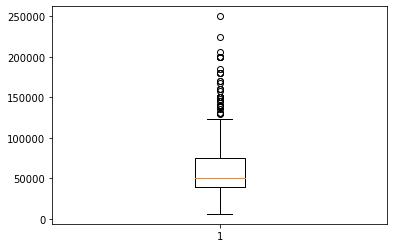

In [17]:
plt.boxplot(df["Price"])
plt.show()

In [18]:
#remove these outliers by setting a upper limit for the "Price" column
df = df[df["Price"] < df["Price"].quantile(0.95)]

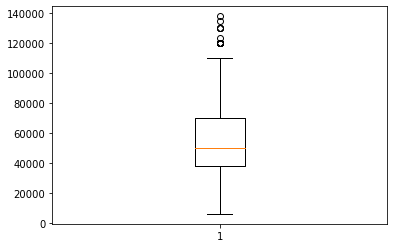

In [19]:
plt.boxplot(df["Price"])
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Sqft", "Bedroom", "Living.Room", "Bathroom", "Price"]] = scaler.fit_transform(df[["Sqft", "Bedroom", "Living.Room", "Bathroom", "Price"]])

print(df.head())

       Sqft   Bedroom  Living.Room  Bathroom     Price
0 -0.407511 -0.797818     0.455631  0.396615  0.250599
1  1.179684  1.242723     0.455631  0.396615  0.901929
2 -0.472415 -0.797818     0.455631 -1.205605  0.087767
3  0.058617  0.222453     0.455631  0.396615 -0.441439
4 -0.755632  0.222453     0.455631  0.396615 -0.441439


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


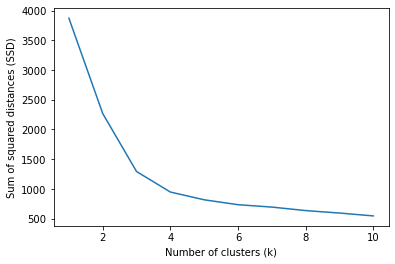

In [24]:
from sklearn.cluster import KMeans

# Create an empty list to store the SSD values for each k
ssd = []

# Iterate through different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

# Plot the SSD values for each k
plt.plot(range(1, 11), ssd)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of squared distances (SSD)")
plt.show()


In [ ]:
# Selecting the optimal value of k
optimal_k = 4


In [22]:
# Fit the KMeans model with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)

# Create a new column in the dataframe to store the cluster label
df['Cluster'] = kmeans.labels_

# Print the first few rows of the dataframe to see the new column
print(df.head())


       Sqft   Bedroom  Living.Room  Bathroom     Price  Cluster
0 -0.407511 -0.797818     0.455631  0.396615  0.250599        3
1  1.179684  1.242723     0.455631  0.396615  0.901929        1
2 -0.472415 -0.797818     0.455631 -1.205605  0.087767        2
3  0.058617  0.222453     0.455631  0.396615 -0.441439        3
4 -0.755632  0.222453     0.455631  0.396615 -0.441439        3


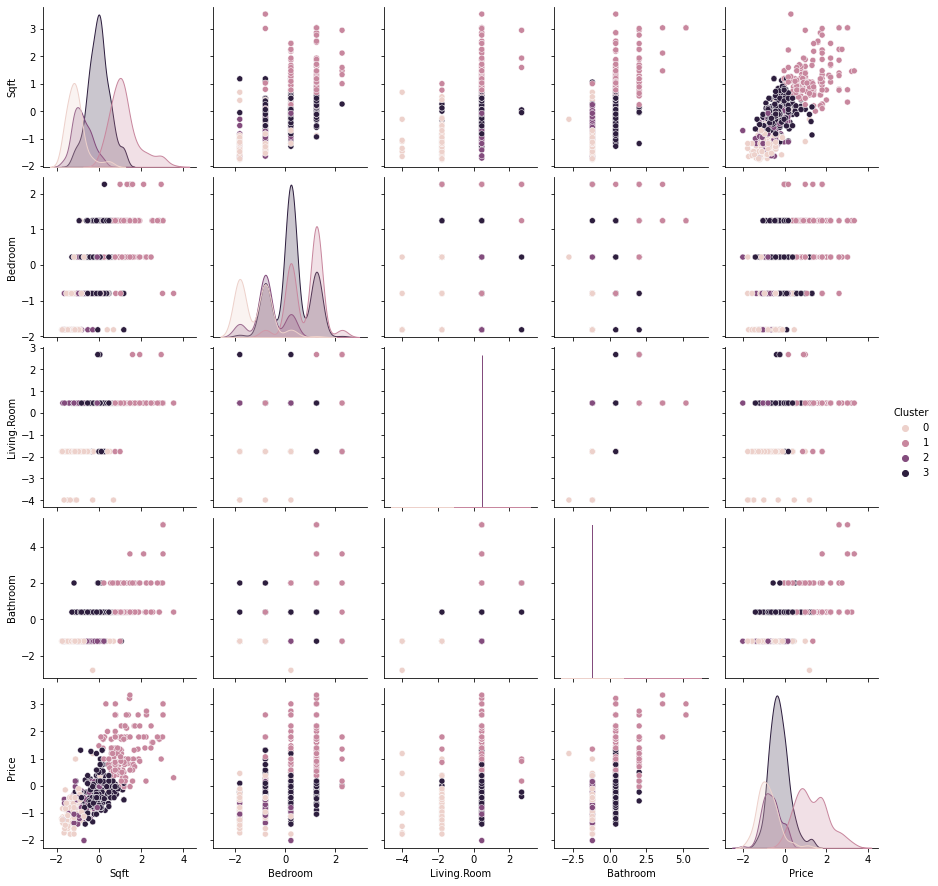

In [23]:
sns.pairplot(df, hue = 'Cluster')
